
<span style="font-weight: bold;font-size: 30px; color: black;"> Machine Learning - Assignment 2 - Implementing a Supervised Learning Flow-TITANIC</span>

<div style="background-color: none; font-size: 18px; color: black; padding: 0; margin: 0; text-align: left;">
    <p>Names of the students:</p>
</div>

<div style="background-color: none; font-size: 12px; color: black; padding: 0; margin: 0; text-align: left;">
    <p>Name: Arthur Anikin Last_4_ID_Digits:1416</p>
    <p>Name: Yana Sladkov Last_4_ID_Digits:0012</p>
    <p>Name: John Asoor Last_4_ID_Digits:4176</p>
</div>

In [1]:
# ייבוא הספריות הדרושות
import pandas as pd  # לטיפול בניתוח ועיבוד נתונים
import matplotlib.pyplot as plt  # להדמיה של נתונים (גרפים)
import seaborn as sns  # להדמיות מתקדמות (גרפים מורכבים יותר)
from IPython.display import display#משמשת להצגת אובייקטים בצורה אינטראקטיבית וברורה
from sklearn.model_selection import GridSearchCV  # לבחירת המודל הטוב ביותר והפרמטרים
from sklearn.metrics import classification_report, make_scorer, f1_score  #F1 להערכת המודל עם מדד
from sklearn.tree import DecisionTreeClassifier # Decision Tree ייבוא המודל לסיווג נתונים
from sklearn.neighbors import KNeighborsClassifier # KNN ייבוא המודל לסיווג נתונים 
from sklearn.feature_selection import SelectKBest, f_classif # SelectKBest ו- f_classif ייבוא כלים לבחירת התכונות הכי רלוונטיות 
from sklearn.preprocessing import StandardScaler # StandardScaler ייבוא הכלי לנרמול הנתונים 
from sklearn.decomposition import PCA # PCA ייבוא הכלי להפחתת ממדים 



<div style="background-color: none; font-size: 18px; color: black; padding: 0; margin: 0; text-align: left;">
    <p>Step 1: Loading the TrainSet and TestSet and Displaying the First 5 Rows:</p>
</div>

<div style="background-color: none; font-size: 12px; color: black; padding: 0; margin: 0; text-align: left;">
    <p>Here we load both datasets and display the first 5 rows from each:</p>
</div>


In [2]:


# טען את מערכי הנתונים לאימון ולבדיקה באמצעות נתיבים יחסיים
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

print("Train Dataset - First 5 Rows:")
display(train_df.head())  # הצגה של קובץ האימון בצורה של טבלה

print("\nTest Dataset - First 5 Rows:")
display(test_df.head())  # הצגה של קובץ הבדיקה בצורה של טבלה


Train Dataset - First 5 Rows:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0



Test Dataset - First 5 Rows:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


<div style="background-color: none; font-size: 18px; color: black; padding: 0; margin: 0; text-align: left;">
    <p>Step 1: EDA Visualizations and Outputs</p>
</div>

<div style="background-color: none; font-size: 12px; color: black; padding: 0; margin: 0; text-align: left;">
    <p><span style="font-weight: bold;">1. First Output:</span> Basic Statistics of the Dataset</p>
</div>


In [3]:

# טען את קובץ האימון
train_df = pd.read_csv('titanic_train.csv')
# מציג את הסטטיסטיקות של הנתונים בקובץ האימון
print("Train Dataset Statistics:")  # הודעה שמציגה את כותרת הסטטיסטיקות
display(train_df.describe())  # מציג סטטיסטיקות עבור כל העמודות המספריות בצורה של טבלה יפה


Train Dataset Statistics:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


<div style="background-color: none; font-size: 12px; color: black; padding: 0; margin: 0; text-align: left;">
    <p><span style="font-weight: bold;">2. Second Output:</span> Checking for Missing Values</p>
</div>

In [4]:

# טען את קובץ האימון
train_df = pd.read_csv('titanic_train.csv')
# יצירת DataFrame שמציג את מספר הערכים החסרים בכל עמודה
missing_values = train_df.isnull().sum().reset_index()  # מחשב את הערכים החסרים ומציג בצורה של טבלה
missing_values.columns = ['Column', 'Missing Values']  # הגדרת כותרות לטבלה
# הצגת הטבלה בצורה יפה
print("Missing values in train dataset:")
display(missing_values)


Missing values in train dataset:


,Column,Missing Values
0,Pclass,0
1,Sex,0
2,Age,0
3,SibSp,0
4,Parch,0
5,Fare,0
6,Embarked,0
7,Survived,0


<div style="background-color: none; font-size: 30px; color: black; padding: 0; margin: 0; text-align: left;">
    <p>Age distribution</p></div>This graph shows the distribution of passengers' ages in the training dataset. Each bar represents the number of people within a certain age range. The smooth line on the graph (the KDE curve) helps us see the overall trend of the age distribution. It gives a clear picture of which age groups had more passengers and how the ages are spread out.

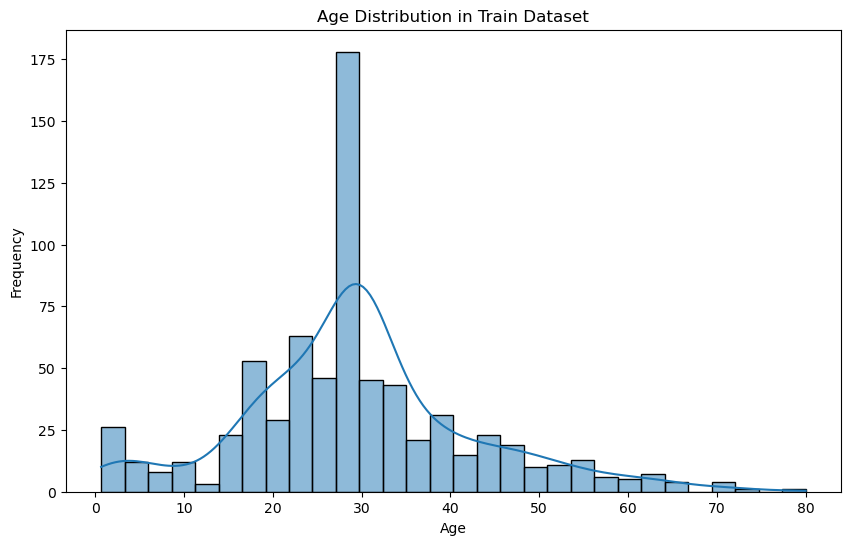

In [5]:

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#------------------------------------------------------------------------------
# יצירת גרף שמציג את ההתפלגות של עמודת גיל בקובץ האימון
plt.figure(figsize=(10, 6)) # הגדרת גודל התרשים
sns.histplot(train_df['Age'].dropna(), kde=True, bins=30) # יצירת גרף עמודות להתפלגות גיל עם עקומת צפיפות ו-30 עמודות
plt.title('Age Distribution in Train Dataset')  # הוספת כותרת לתרשים
plt.xlabel('Age') # הוספת תווית לציר האופקי
plt.ylabel('Frequency') # הוספת תווית לציר האנכי
plt.show() # הצגת התרשים
#------------------------------------------------------------------------------



<div style="background-color: none; font-size: 30px; color: black; padding: 0; margin: 0; text-align: left;">
    <p>Pie chart</p></div>
    This code creates a pie chart that shows the distribution of passenger classes in the training dataset. Each slice of the pie represents a passenger class (1st, 2nd, or 3rd class), and the size of each slice is proportional to the percentage of passengers in that class. The chart uses customized colors and includes percentage labels for each slice. There's also a title at the top, and the y-axis label is removed for a cleaner look. The chart helps visually compare the proportion of passengers in each class.

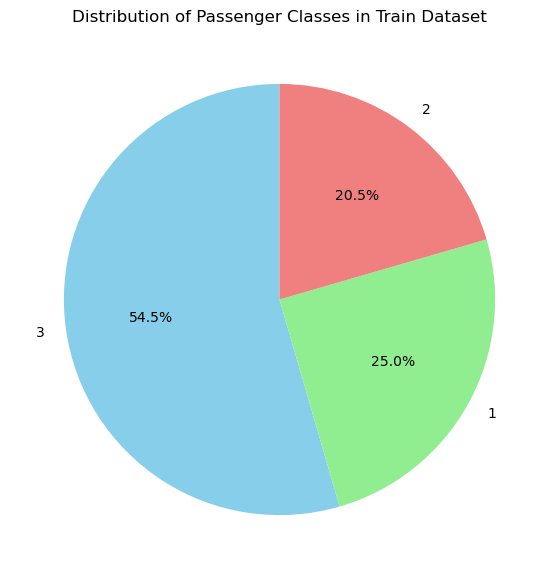

In [6]:
#------------------------------------------------------------------------------
# יצירת תרשים עוגה המציג את חלוקת מחלקות הנוסעים בקובץ האימון
plt.figure(figsize=(7, 7)) # הגדרת גודל התרשים
train_df['Pclass'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral']) # יצירת תרשים עוגה עם חלוקה לאחוזים וצבעים מותאמים
plt.title('Distribution of Passenger Classes in Train Dataset') # הוספת כותרת לתרשים
plt.ylabel('')  #Y הסרת תווית ציר 
plt.show() # הצגת התרשים
#------------------------------------------------------------------------------


<div style="background-color: none; font-size: 30px; color: black; padding: 0; margin: 0; text-align: left;">
    <p>correlation matrix</p>
</div>This code creates a correlation matrix heatmap, showing how different variables in the dataset are related. The colors represent the strength of the relationships: blue means positive correlation, red means negative. The numbers inside each cell show the exact correlation values. It helps quickly see which variables are connected.

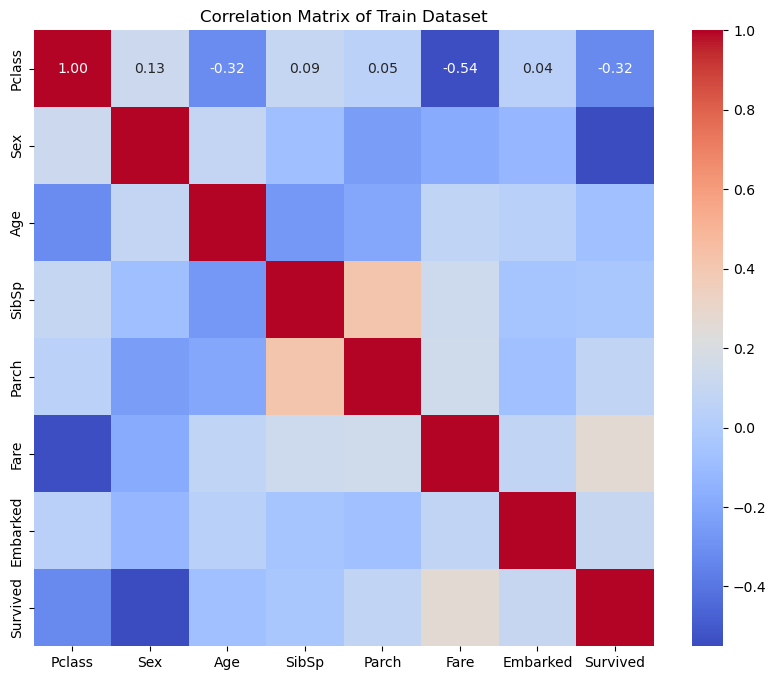

In [7]:
#------------------------------------------------------------------------------
# יצירת מטריצת קורלציה להצגת היחסים בין המשתנים השונים בקובץ האימון
plt.figure(figsize=(10, 8))  # הגדרת גודל התרשים
correlation_matrix = train_df.corr()  # חישוב הקורלציה בין כל המשתנים
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # יצירת מטריצת קורלציה כתרשים חום
plt.title('Correlation Matrix of Train Dataset')  # הוספת כותרת לתרשים
plt.show()  # הצגת התרשים
#------------------------------------------------------------------------------
 


<div style="background-color: none; font-size: 30px; color: black; padding: 0; margin: 0; text-align: left;">
    <p>Box plot</p>
</div>This code creates a box plot that compares ticket prices across passenger classes. The plot shows how fares are distributed within each class, highlighting the range of prices, medians, and any outliers. It's a quick way to see the differences in ticket prices between the 1st, 2nd, and 3rd classes

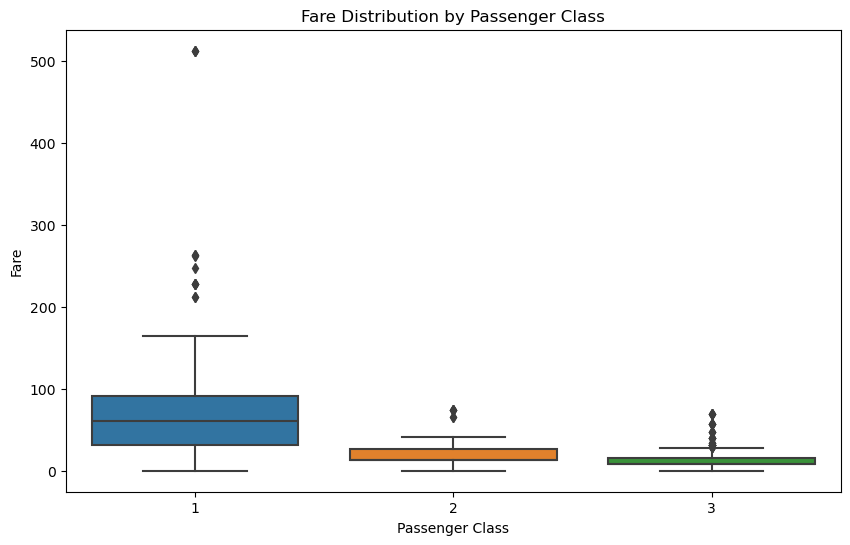

In [8]:
#------------------------------------------------------------------------------
# יצירת תרשים קופסה להשוואת מחיר הכרטיס לפי מחלקות הנוסעים
plt.figure(figsize=(10, 6))  # קביעת גודל הגרף (הרוחב והגובה)
sns.boxplot(x='Pclass', y='Fare', data=train_df)  # יצירת תרשים קופסה להצגת ההתפלגות של מחירי הכרטיס לפי מחלקות הנוסעים
plt.title('Fare Distribution by Passenger Class')  # הוספת כותרת לגרף
plt.xlabel('Passenger Class')  # הוספת תווית לציר האופקי שמציין את מחלקות הנוסעים
plt.ylabel('Fare')  # הוספת תווית לציר האנכי שמציין את מחירי הכרטיסים
plt.show()  # הצגת התרשים
#------------------------------------------------------------------------------


<div style="background-color: none; font-size: 30px; color: black; padding: 0; margin: 0; text-align: left;">
    <p>Explanation</p>
</div>
In this project, I am building machine learning models to predict whether a passenger survived or not based on features like age, gender, and class from the Titanic dataset. I use models like K-Nearest Neighbors (KNN) and Decision Trees to classify passengers as either survivors or non-survivors and evaluate the model performance using F1-Score.

<div style="background-color: none; font-size: 30px; color: black; padding: 0; margin: 0; text-align: left;">
    <p>Preparing the data</p>
</div>
In this step, we are preparing the data before training the model. First, we separate the features (X) from the target column (y) in both the train and test sets. The target column is used to predict the outcome ('Survived' in this case). Next, we handle missing values in the 'Age' column by filling the missing values with the mean of the ages. This step is crucial to ensure there are no missing values, as machine learning models cannot handle missing data directly. The data preparation ensures clean and complete data for the model to train effectively.

In [9]:
scorer = make_scorer(f1_score, average='macro')  # F1 Score הגדרת פונקציית הערכה על בסיס מאקרו
test_df = pd.read_csv('titanic_test.csv')  # טעינת קובץ הבדיקה

#ועמודת המטרה Train Set הפרדה בין תכונות 
X_train = train_df.drop('Survived', axis=1)  #'Survived' מסירים מטריין סט את עמודת
y_train = train_df['Survived']  #(Target) בתור עמודת המטרה 'Survived' שומרים את עמודת 

#(Test Set) בקובץ הבדיקה 'Survived' בדיקה אם קיימת עמודת 
if 'Survived' in test_df.columns:
    X_test = test_df.drop('Survived', axis=1)#'Survived' מסירים מטסט סט את עמודת
    y_test = test_df['Survived'] #(Target) בתור עמודת המטרה 'Survived' שומרים את עמודת 
else:
    X_test = test_df  #'Survived' אם אין עמודת 

# טיפול בערכים חסרים
X_train['Age'].fillna(X_train['Age'].mean(), inplace=True)#ממלאים ערכים חסרים בטריין סט לפי ממוצע הגילאים
X_test['Age'].fillna(X_test['Age'].mean(), inplace=True)#ממלאים ערכים חסרים בטסט סט לפי ממוצע הגילאים    

<div style="background-color: none; font-size: 12px; color: black; padding: 0; margin: 0; text-align: left;">
    <p><span style="font-weight: bold; font-size: 20px;">Decision Tree:</p>
    <p><span style="font-weight: bold;">Hyperparameters:</span></p>
    <p>* max_depth: Controls how deep the decision tree can grow to prevent overfitting.</p>
    <p>* min_samples_split: The minimum number of samples required to split a node, preventing too many splits on small datasets.</p>
    <p><span style="font-weight: bold;">Feature Engineering:</span></p>
    <p>* One-Hot Encoding: Converts categorical variables into binary numerical values to be used in the model.</p>
    <p>* Feature Selection: Selects the most statistically relevant features to improve model performance by reducing irrelevant data.</p>
</div>


In [10]:
#------------------------------------------------------------------------------
#One-Hot Encoding:
#המרה של עמודות מסוג קטגוריות לערכים מספריים
X_train_dt = pd.get_dummies(X_train, columns=['Sex', 'Embarked'], drop_first=True) # המרת עמודות מגדר ותחנה לערכים בינאריים
X_test_dt = pd.get_dummies(X_test, columns=['Sex', 'Embarked'], drop_first=True)  # המרת עמודות בטסט סט באותו אופן
#------------------------------------------------------------------------------


#------------------------------------------------------------------------------
#Feature Selection (SelectKBest): 
# בחירת התכונות הטובות ביותר בעזרת בחירת תכונות סטטיסטיות
selector_dt = SelectKBest(score_func=f_classif, k=5)  # בוחרים את חמש התכונות עם המשמעות הסטטיסטית הגבוהה ביותר
X_train_dt_selected = selector_dt.fit_transform(X_train_dt, y_train)  # התאמת הפונקציה על הטריין סט
X_test_dt_selected = selector_dt.transform(X_test_dt)  # החלת הפונקציה על הטסט סט
#------------------------------------------------------------------------------


# יצירת מודל עץ החלטות ללא הפחתת מימדים
model_dt = DecisionTreeClassifier()  # יצירת מודל עץ החלטות

# הגדרת רשת פרמטרים עבור עץ ההחלטות
param_grid_dt = {
    'max_depth': [None, 10, 20],  # עומק מקסימלי של העץ
    'min_samples_split': [2, 5]   # מספר הדוגמאות המינימלי לפיצול
}

# ביצוע חיפוש רשת על המודל עם הפרמטרים המוגדרים
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, scoring=scorer, cv=5)  # חיפוש הפרמטרים הטובים ביותר
grid_search_dt.fit(X_train_dt_selected, y_train)  # אימון המודל על הטריין סט

# הצגת הפרמטרים והתוצאה הטובה ביותר
print(f"Best Parameters (עץ החלטות): {grid_search_dt.best_params_}")
print(f"Best Cross-Validation F1 Score (עץ החלטות): {grid_search_dt.best_score_}")


Best Parameters (עץ החלטות): {'max_depth': 10, 'min_samples_split': 5}
Best Cross-Validation F1 Score (עץ החלטות): 0.7801981505606888


<div style="background-color: none; font-size: 12px; color: black; padding: 0; margin: 0; text-align: left;">
    <p><span style="font-weight: bold; font-size: 20px;">KNN:</p>
    <p><span style="font-weight: bold;">Hyperparameters:</span></p>
    <p>* n_neighbors: Defines the number of closest data points used for classification.</p>
    <p>* weights: Determines how to weight the neighbors' votes, either equally ('uniform') or based on distance ('distance').</p>
    <p><span style="font-weight: bold;">Feature Engineering:</span></p>
    <p>* One-Hot Encoding: Converts categorical text columns ('Sex', 'Embarked') into binary numerical values for the model to process.</p>
    <p>* Feature Scaling: Normalizes the data to ensure all features are on a similar scale for KNN to work effectively.</p>
    <p>* Dimensionality Reduction (PCA): Reduces the number of features to simplify the dataset while retaining as much information as possible.</p>
</div>


In [11]:
#------------------------------------------------------------------------------
#One-Hot Encoding:
# המרת עמודות טקסטואליות לערכים מספריים בעזרת שיטת קידוד קטגוריות
X_train_hot_knn = pd.get_dummies(X_train, columns=['Sex', 'Embarked'], drop_first=True)
X_test_hot_knn = pd.get_dummies(X_test, columns=['Sex', 'Embarked'], drop_first=True)
#------------------------------------------------------------------------------

#------------------------------------------------------------------------------
#Feature Scaling:
# נרמול הנתונים כדי להבטיח שכל תכונה תהיה בסקלה דומה
scaler_knn = StandardScaler()
X_train_knn_scaled = scaler_knn.fit_transform(X_train_hot_knn)
X_test_knn_scaled = scaler_knn.transform(X_test_hot_knn)
#------------------------------------------------------------------------------


#------------------------------------------------------------------------------
#Dimensionality Reduction (PCA):
# הקטנת מספר הממדים במטרה לפשט את הנתונים
pca_knn = PCA(n_components=3)
X_train_knn_pca = pca_knn.fit_transform(X_train_knn_scaled)
X_test_knn_pca = pca_knn.transform(X_test_knn_scaled)
#------------------------------------------------------------------------------


# בניית המודל על בסיס קירובים של השכנים הקרובים ביותר
model_knn = KNeighborsClassifier()

# הגדרת טווחים עבור פרמטרים על מנת למצוא את השילוב הטוב ביותר
param_grid_knn = {
    'n_neighbors': [3, 5, 7],  # מספר השכנים הקרובים 
    'weights': ['uniform', 'distance']  # שיטת המשקלות - אחיד או לפי מרחק
}

# חיפוש הפרמטרים הטובים ביותר בעזרת חיפוש מבוסס רשת
grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid_knn, scoring=scorer, cv=5)
grid_search_knn.fit(X_train_knn_pca, y_train)

# הצגת הפרמטרים הטובים ביותר ותוצאת המודל הטובה ביותר
print(f"Best Parameters (KNN): {grid_search_knn.best_params_}")
print(f"Best Cross-Validation F1 Score (KNN): {grid_search_knn.best_score_}")



Best Parameters (KNN): {'n_neighbors': 3, 'weights': 'uniform'}
Best Cross-Validation F1 Score (KNN): 0.7736985432795895


<div style="background-color: none; font-size: 30px; color: black; padding: 0; margin: 0; text-align: left;">
    <p>Retraining the Decision Tree Model with Optimized Feature Engineering and Hyperparameters</p>
</div>
In this step, we are implementing the best-performing combination of feature engineering and hyperparameters for the Decision Tree model. First, we convert categorical columns like 'Sex' and 'Embarked' into numerical values using one-hot encoding, which allows the model to process these categorical features effectively. Then, we select the five most relevant features using the SelectKBest method to enhance the model's performance by focusing on the most important data points. After that, we normalize the selected features to ensure that all values are on a similar scale, although normalization isn't always necessary for decision trees. Finally, we train the Decision Tree model with the best hyperparameters obtained from the grid search and print a confirmation that the model has been successfully retrained. This ensures the model is optimized to deliver the best results based on our earlier experiments.

In [12]:

# המרת עמודות קטגוריאליות לערכים מספריים בעזרת שיטת קידוד קטגוריות
X_train_dt = pd.get_dummies(X_train, columns=['Sex', 'Embarked'], drop_first=True)

# בחירת התכונות הרלוונטיות ביותר מתוך התכונות בעזרת בחירה אוטומטית
selector_dt = SelectKBest(score_func=f_classif, k=5)  # בוחר את 5 התכונות הרלוונטיות ביותר
X_train_dt_selected = selector_dt.fit_transform(X_train_dt, y_train)

# נרמול הנתונים כדי להבטיח שכל התכונות יהיו באותה סקלה (נורמליזציה)
scaler = StandardScaler()
X_train_dt_scaled = scaler.fit_transform(X_train_dt_selected)

# שימוש במודל עץ החלטות עם הפרמטרים הטובים ביותר שנמצאו על פי החיפוש ברשת
best_model_dt = DecisionTreeClassifier(**grid_search_dt.best_params_)

# אימון המודל על כל קבוצת האימון עם התכונות המנורמלות
best_model_dt.fit(X_train_dt_scaled, y_train)

# הדפסת הודעה המציינת שהמודל אומן בהצלחה עם הפרמטרים הטובים ביותר
print("The Decision Tree model has been successfully retrained with the best parameters!")


The Decision Tree model has been successfully retrained with the best parameters!


<div style="background-color: none; font-size: 30px; color: black; padding: 0; margin: 0; text-align: left;">
    <p>Prediction and Model Evaluation - Applying the Model on the Test Set and Assessing its Performance</p>
</div>
In this step, we prepare the test data by handling missing values in 'Age' and converting categorical columns into numerical values. We apply feature selection and normalization, just like in the training set. The trained Decision Tree model is then used to predict the test set outcomes. We display the first five predictions and evaluate the model's performance with a classification report, including metrics like precision, recall, and F1 score (Macro), to measure the model's effectiveness on unseen data.

In [13]:

# טיפול בערכים חסרים בעמודת גיל בטסט סט
X_test['Age'].fillna(X_test['Age'].mean(), inplace=True)

# המרת עמודות קטגוריאליות לערכים מספריים בטסט סט (כמו שעשינו בטריין סט)
X_test_dt = pd.get_dummies(X_test, columns=['Sex', 'Embarked'], drop_first=True)

# בחירת התכונות הרלוונטיות ביותר לפי השיטה שבחרנו קודם
X_test_dt_selected = selector_dt.transform(X_test_dt)

# נרמול הטסט סט (אם ביצענו נרמול גם בטריין סט, נבצע גם כאן)
X_test_dt_scaled = scaler.transform(X_test_dt_selected)

# חיזוי על כל הדוגמאות בטסט סט באמצעות המודל המאומן
y_pred_dt = best_model_dt.predict(X_test_dt_scaled)

# הצגת 5 החיזויים הראשונים
print("First 5 Predictions on Test Set:")
print(y_pred_dt[:5])

# בדיקת איכות המודל על הטסט סט

# הצגת דוח ביצועים מלא על הטסט סט
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_dt))

# F1 Score 
test_f1_dt = f1_score(y_test, y_pred_dt, average='macro')
print(f"F1 Score (Macro) on Test Set: {test_f1_dt}")


First 5 Predictions on Test Set:
[0 0 0 1 1]
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       118
           1       0.79      0.69      0.74        61

    accuracy                           0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179

F1 Score (Macro) on Test Set: 0.8069456427955134
